### Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.

In [161]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    xs=[x]
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        xs.append(x)
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration,xs]

In [132]:
# модифицированная реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def hard_newton(func, dfunc, x, tol = 1e-12, kratnost = 1):
    sol = 0
    iteration = 0
    dxs = []
    xs = [x] #запоминаем точки для избавления от биений
    for i in range(30):
        iteration += 1
        while dfunc(x) == 0:    # Здесь избавимся от обнуления производной, 
                                # если она равна нулю, то делаем сдвиг на константу
                                # если нашли корень, то останавливаем поиск
            if func(x)==0:
                dxs.append(None)
                return [x,iteration, dxs]
            x-=1
        dx = -func(x)/dfunc(x)
        dx *= kratnost #умножаем на кратность корня для избавления от кратных корней
        dxs.append(abs(dx))
        x = x + dx 
        if x in xs: #Если произошло биение(зациклилось), то берем середину отрезка между предыдущей точкой и этой
            x=(xs[-1]+x)/2
            xs=[]
        xs.append(x)
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

#### Нелинейное уравнение 1

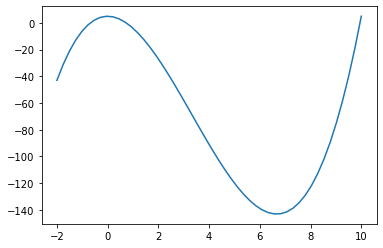

In [133]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат


1.  Результаты разные в случаях 1 и 2, потому что для метода ньютона даны разные начальные приближения, находящиеся в окрестностях разных корней. Отсюда и получаем, что метод Ньютона сходится к 2 разным корням.
2. В случае 3 начальное приближение такое, что производная $f$ обращается в 0, и функция $\phi$ не определена в точке 0.
3. Получаем график порядка сходимости(ниже). Видим, что он стремится к 2, что согласуется с тем, что метод ньютона имеет квадратичную сходимость.

In [134]:
# data = simple_newton(func0, dfunc0, 8) # случай 1
data = simple_newton(func0, dfunc0, 0.7) # случай 2
# data = simple_newton(func0, dfunc0, 0.0) # случай 3
print('sol = ', data[0])
print('iter = ', data[1])

sol =  0.7346035077893033
iter =  4


In [218]:
# data = hard_newton(func0, dfunc0, 8) # случай 1
# data = hard_newton(func0, dfunc0, 0.7) # случай 2
data = hard_newton(func0, dfunc0, 0.0) # случай 3
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -0.6840945657036895
iter =  6


-0.6840945657036895



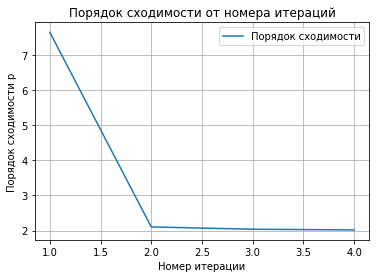

In [245]:
#скрипт, который реализует описанный выше алгоритм
%matplotlib inline
import numpy as np
import math
import numpy.linalg as la
import matplotlib.pyplot as plt


def simple_newton_plot(func, dfunc, x, stop):
    sol = 0
    iteration = 0
    dxs = []
    while iteration !=stop:
        iteration += 1
        while dfunc(x) == 0:
            if func(x)==0:
                return [x, dxs]
            x+=1
        dx = -func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        sol = x
    return [sol, dxs]

def hard_newton_plot(func,dfunc,x,stop,kratnost):
    sol = 0
    iteration = 0
    dxs = []
    xs = [x] #запоминаем точки для избавления от биений
    allxs = [x] # запоминаем все точки для построения графика
    while iteration!=stop:
        iteration += 1
        while dfunc(x) == 0:    # Здесь избавимся от обнуления производной, 
                                # если она равна нулю, то делаем сдвиг на константу
                                # если нашли корень, то останавливаем поиск
            if func(x)==0:
                dxs.append(None)
                return [x, dxs]
            x-=1
        dx = -func(x)/dfunc(x)
        dx *= kratnost #умножаем на кратность корня для избавления от кратных корней
        dxs.append(abs(dx))
        x = x + dx
        if x in xs: #Если произошло биение(зациклилось), то берем середину отрезка между предыдущей точкой и этой
            x=(xs[-1]+x)/2
            xs=[]
        xs.append(x)
        allxs.append(x)
        sol = x
    return [sol, dxs, allxs]

def make_plot(func0, dfunc0, x0, x_true, n_dots, kratnost):
    data = hard_newton_plot(func0, dfunc0, x0, n_dots, kratnost)
    print(data[0])
    allxs = data[2]
    # print(allxs)
    x=[]
    y=[]
    for i in range(len(allxs)-1):
        try:
            y.append(math.log(abs(allxs[i+1] - x_true))/math.log(abs(allxs[i]-x_true)))
        except:
            y.append(float('nan'))
        # y.append(allxs[i])
        x.append(i+1)
    plt.plot(x,y, label= 'Порядок сходимости')
    plt.legend() #отрисовываем легеду. Здесь в верхнем левом углу, но можно поменять
    plt.grid() #добавляем сетку на график
    plt.xlabel('Номер итерации') #подписываем ось x
    plt.ylabel('Порядок сходимости p') #подписываем ось x
    plt.title('Порядок сходимости от номера итераций',) #подписываем график
    print()
make_plot(func0, dfunc0, 0.0, float('-0.68409456570368944'), 8, 1)


Как видно на графике, модифицированный алгоритм имеет порядок сходимости 2, что согласуется с теорией 

#### Нелинейное уравнение 2

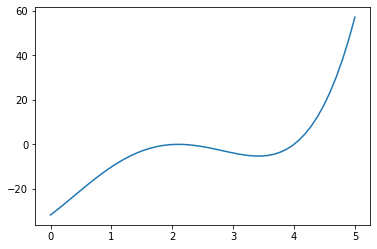

In [187]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 #double root
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)

1. Построить график порядка сходимости от номера итерации. Объяснить результат

In [201]:
data = hard_newton(func1, dfunc1, 2.0, 100 ,2)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  2.098829648894669
iter =  1


2.100000000014807



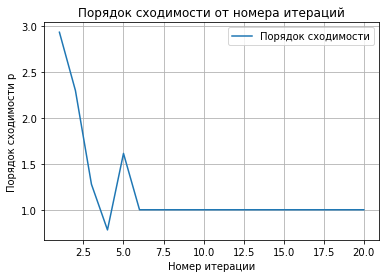

In [246]:
# dxs = hard_newton_plot(func1,dfunc1,2.0, 100, 2)[1]

# x=[]
# y=[]
# for i in range(len(dxs)-1):
#     if dxs[i+1]==0:
#         print(f'error: ln(0), i={i+1}')
#         break
#     x.append(i+1)
#     y.append(math.log(dxs[i+1])/math.log(dxs[i]))
# plt.yscale('log')
# plt.plot(x,y, label= 'Порядок сходимости')
# plt.legend() #отрисовываем легеду. Здесь в верхнем левом углу, но можно поменять
# plt.grid() #добавляем сетку на график
# plt.xticks(x)
# plt.xlabel('Номер итерации') #подписываем ось x
# plt.ylabel('Порядок сходимости p') #подписываем ось x
# plt.title('Порядок сходимости от номера итераций',) #подписываем график
# print()
make_plot(func1,dfunc1,2.0,2.1,20,2)

На графике видно, что в пределе порядок сходимости равен 1 и скорость сходимости линейна. Это происходит потому что производная в точке корня равна нулю.

#### Нелинейное уравнение 3

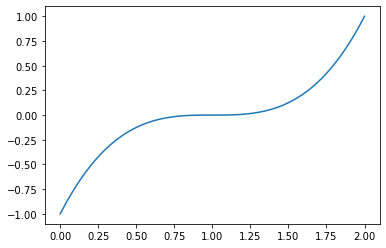

In [146]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

In [202]:

# начальное приближение ищем с помощью бин поиска

a = -100
b = 50  # выбираем разумные границы отрезка
if func2(a)*func2(b) > 0:   # если на +бесконечности и -бесконечности одинаковые знаки, то ноль где-то  внутри.
                            # в этом случае дальше искать сложно, только перебором
    x0 = (a+b)/2

step = 1

tol = 1
while func2((a+b)/2) != 0 or b-a > tol: #бин поиск границ отрезка
    if func2((a+b)/2) * func2(a) > 0: 
        a = (a+b)/2
    else:
        b = (a+b)/2

x0 = (a+b)/2

# решаем задачу
data = hard_newton(func2, dfunc2, x0) 
print('sol = ', data[0])
print('iter = ', data[1])


sol =  1.0
iter =  1


#### Нелинейное уравнение 4

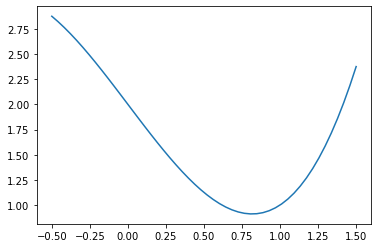

In [203]:
x = np.linspace(-0.5,1.5)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае?

Решение не находится во втором случае из-за биений: алгоритм зацикливается и не приближается к корню:

In [204]:
data = simple_newton(func3, dfunc3, 0) # случай 2
print(f'промежуточные значения: {data[2]}')
print('sol = ', data[0])
print('iter = ', data[1])

More then 30 iterations!
промежуточные значения: [0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
sol =  nan
iter =  30


In [205]:
# data = simple_newton(func3, dfunc3, 0.5) # случай 1
data = hard_newton(func3, dfunc3, 0) # случай 2, модифицированный
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -1.7692923542386314
iter =  12
